Preguntas a responder: 
- ¿Qué organización lanzó más misiones espaciales en un año determinado?
- ¿Cuántos lanzamientos se realizaron por año? 
- ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
- ¿Qué meses son los más populares para los lanzamientos? 
- ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

In [2]:
import pandas as pd
url = ("https://raw.githubusercontent.com/oromero18/Portfolio/refs/heads/main/Space_Mission_Launches/mission_launches.csv")

In [3]:
#Se asigna el dataset a un dataframe y se leen las primeras 5 entradas.
df = pd.read_csv(url)
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
#Se identifican columnas con valores identicos y se eliminan
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
#Se renombra una columna para visualización correcta de los datos y se comprueban los cambios
df = df.rename(columns={"Organisation":"Organization"})
print(df.columns)
#Se visualiza información relevante sobre el dataframe
print(df.info())

Index(['Organization', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organization    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB
None


In [5]:
#La columna Date se codifica correctamente a un formato de fecha y se crean dos nuevas columnas, una para los meses y otra para los años.
df['Date'] = pd.to_datetime(df['Date'], format='mixed', utc=True)
df["Month"] = df["Date"].dt.month_name()
df["Year"] = df["Date"].dt.year
#Se comprueban los cambios.
print(df["Date"].count())
df.head()

4324


,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,August,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,August,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,August,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,July,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,July,2020


In [6]:
# Anteriormente se observó que Price tenía una cantidad muy menor de valores al total de filas. 
# Se obtienen datos selevantes
print("La cantidad de valores no nulos en Price es:",df["Price"].count(),"\n")
print("La cantidad de valores nulos en Price es:",df["Price"].isnull().sum(),"\n")
print("El tipo de la columna precio es:",df["Price"].dtype,"\n")
print("El porcentaje de NaN es:",df["Price"].isna().mean() * 100,"\n")
print(df["Price"].unique())

La cantidad de valores no nulos en Price es: 964 

La cantidad de valores nulos en Price es: 3360 

El tipo de la columna precio es: object 

El porcentaje de NaN es: 77.70582793709528 

['50.0' '29.75' nan '65.0' '145.0' '64.68' '48.5' '90.0' '46.0' '28.3'
 '29.15' '7.5' '30.8' '5.3' '12.0' '112.5' '120.0' '153.0' '200.0' '85.0'
 '115.0' '41.8' '21.0' '31.0' '40.0' '164.0' '62.0' '37.0' '350.0' '39.0'
 '47.0' '35.0' '69.7' '109.0' '45.0' '123.0' '130.0' '25.0' '56.5' '15.0'
 '29.0' '80.0' '140.0' '55.0' '59.5' '450.0' '7.0' '20.14' '133.0' '190.0'
 '135.0' '20.0' '136.6' '5,000.0' '1,160.0' '59.0' '63.23']


In [7]:
#Para poder visualizar el porcentaje de valores NaN, se crea una columna Decade
df["Decade"] = (df["Year"]) // 10 * 10
nan_by_decade = df.groupby("Decade")["Price"].apply(lambda x: x.isna().mean() * 100).round(2).reset_index(name="% NaN")
print(nan_by_decade,"\n")

   Decade   % NaN
0    1950  100.00
1    1960   95.74
2    1970   99.41
3    1980   93.03
4    1990   79.44
5    2000   55.79
6    2010   27.96
7    2020   17.46 



In [8]:
#Anteriormente se visualizaron los valores únicos, para hacer una conversión correcta se eliminan las comas
df["Price"] = df["Price"].str.replace(",", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
#Una vez realizados los cambios y la conversión del tipo de columna, se comprueban los cambios
print("La cantidad de valores no nulos es:",df["Price"].count())
print(df["Price"].unique())
print(df["Price"].isnull().sum())
print(df["Price"].dtype)

La cantidad de valores no nulos es: 964
[  50.     29.75     nan   65.    145.     64.68   48.5    90.     46.
   28.3    29.15    7.5    30.8     5.3    12.    112.5   120.    153.
  200.     85.    115.     41.8    21.     31.     40.    164.     62.
   37.    350.     39.     47.     35.     69.7   109.     45.    123.
  130.     25.     56.5    15.     29.     80.    140.     55.     59.5
  450.      7.     20.14  133.    190.    135.     20.    136.6  5000.
 1160.     59.     63.23]
3360
float64


In [9]:
#Se comprueba que la columna Mission Status no tenga valores nulos
print("Valores nulos en la columna Mission Status:",df["Mission_Status"].isnull().sum())
#Se visualizan los tipos de datos que se pueden encontrar en esa columna
print("Variables en la columna Mision Status:",df["Mission_Status"].unique())
#Se crea una nueva columna para visualizar el éxito. Se tendrá a 1 cómo Misión exitosa, y 0 para todas las demás variables.
df["Successed"] = (df["Mission_Status"] == "Success").astype(int)
print(df["Successed"].dtype)
print(df["Successed"].count())

Valores nulos en la columna Mission Status: 0
Variables en la columna Mision Status: ['Success' 'Failure' 'Prelaunch Failure' 'Partial Failure']
int32
4324


In [10]:
# Se agrupa por año y organización, luego se cuentan las misiones
org_year_counts = df.groupby(['Year', 'Organization']).size().reset_index(name='Missions')
## Encontrar la organización con más misiones por año
max_missions_per_year = org_year_counts.loc[org_year_counts.groupby('Year')['Missions'].idxmax()].reset_index(drop=True)
max_missions_per_year.to_csv("max_missions_per_year.csv",index=False)

In [16]:
#Se agrupa por año y se calcula el total de las misiones
launches_per_year = df.groupby('Year').size().reset_index(name='Total_Launches').sort_values(by="Total_Launches",ascending=False)
#Se exporta el dataframe a la base de datos, con nombre de tabla launches_per_year
print(launches_per_year)
launches_per_year.to_csv("launches_per_year.csv",index=False)

    Year  Total_Launches
14  1971             119
61  2018             117
20  1977             114
19  1976             113
18  1975             113
..   ...             ...
53  2010              37
48  2005              37
1   1958              28
2   1959              20
0   1957               3

[64 rows x 2 columns]


In [12]:
##Debido a que el porcentaje de valores nulos es demasiado alto desde la decada de 1990 hacia atrás, para el análisis se considerará
##solo el porcentaje de precio a partir del año 2000 por la impresición que podría generar usar los otros años.
##Se toma la mediana debido al hallazgo de valores extremos, para evitar inconsistencias.
price_trend = df[df['Year'] >= 2000].groupby('Year')['Price'].median().reset_index().round(2)
price_trend.to_csv("price_trend.csv",index=False)

In [13]:
#Se agrupa por mes y se calcula el total de las misiones
monthly_launches = df.groupby('Month').size().reset_index(name='Count')
#Se ordena de mayor a menor
monthly_launches = monthly_launches.sort_values('Count', ascending=False)
#Se exporta el dataframe a la base de datos, con nombre de tabla monthly_launches
monthly_launches.to_csv("monthly_launches.csv",index=False)

In [14]:
# Calcular tasa de éxito anual
success_trend = df.groupby('Year')['Successed'].mean().reset_index().round(4)
success_trend.to_csv(f"success_trend.csv",index=False)


# Resultados del análisis.

1. El año con más lanzamientos fue 1971, con 119 lanzamientos.
2. Los registros sobre los precios de los lanzamientos antes del año 2000 son muy pocos para realizar un análisis sólido.
3. El mes más recurrente para realizar lanzamientos fue diciembre.
4. La taza de éxito anual se mantiene arriba del 90%.

# Dashboard
### Enlace Tableau:
[Dashboard](https://public.tableau.com/views/Space_missions_17441322922650/Dashboard1?:language=en-US&amp;publish=yes&amp;:sid=&amp;:redirect=auth&amp;:display_count=n&amp;:origin=viz_share_link)

![Dashboard 1-3.png](<attachment:Dashboard 1-3.png>)
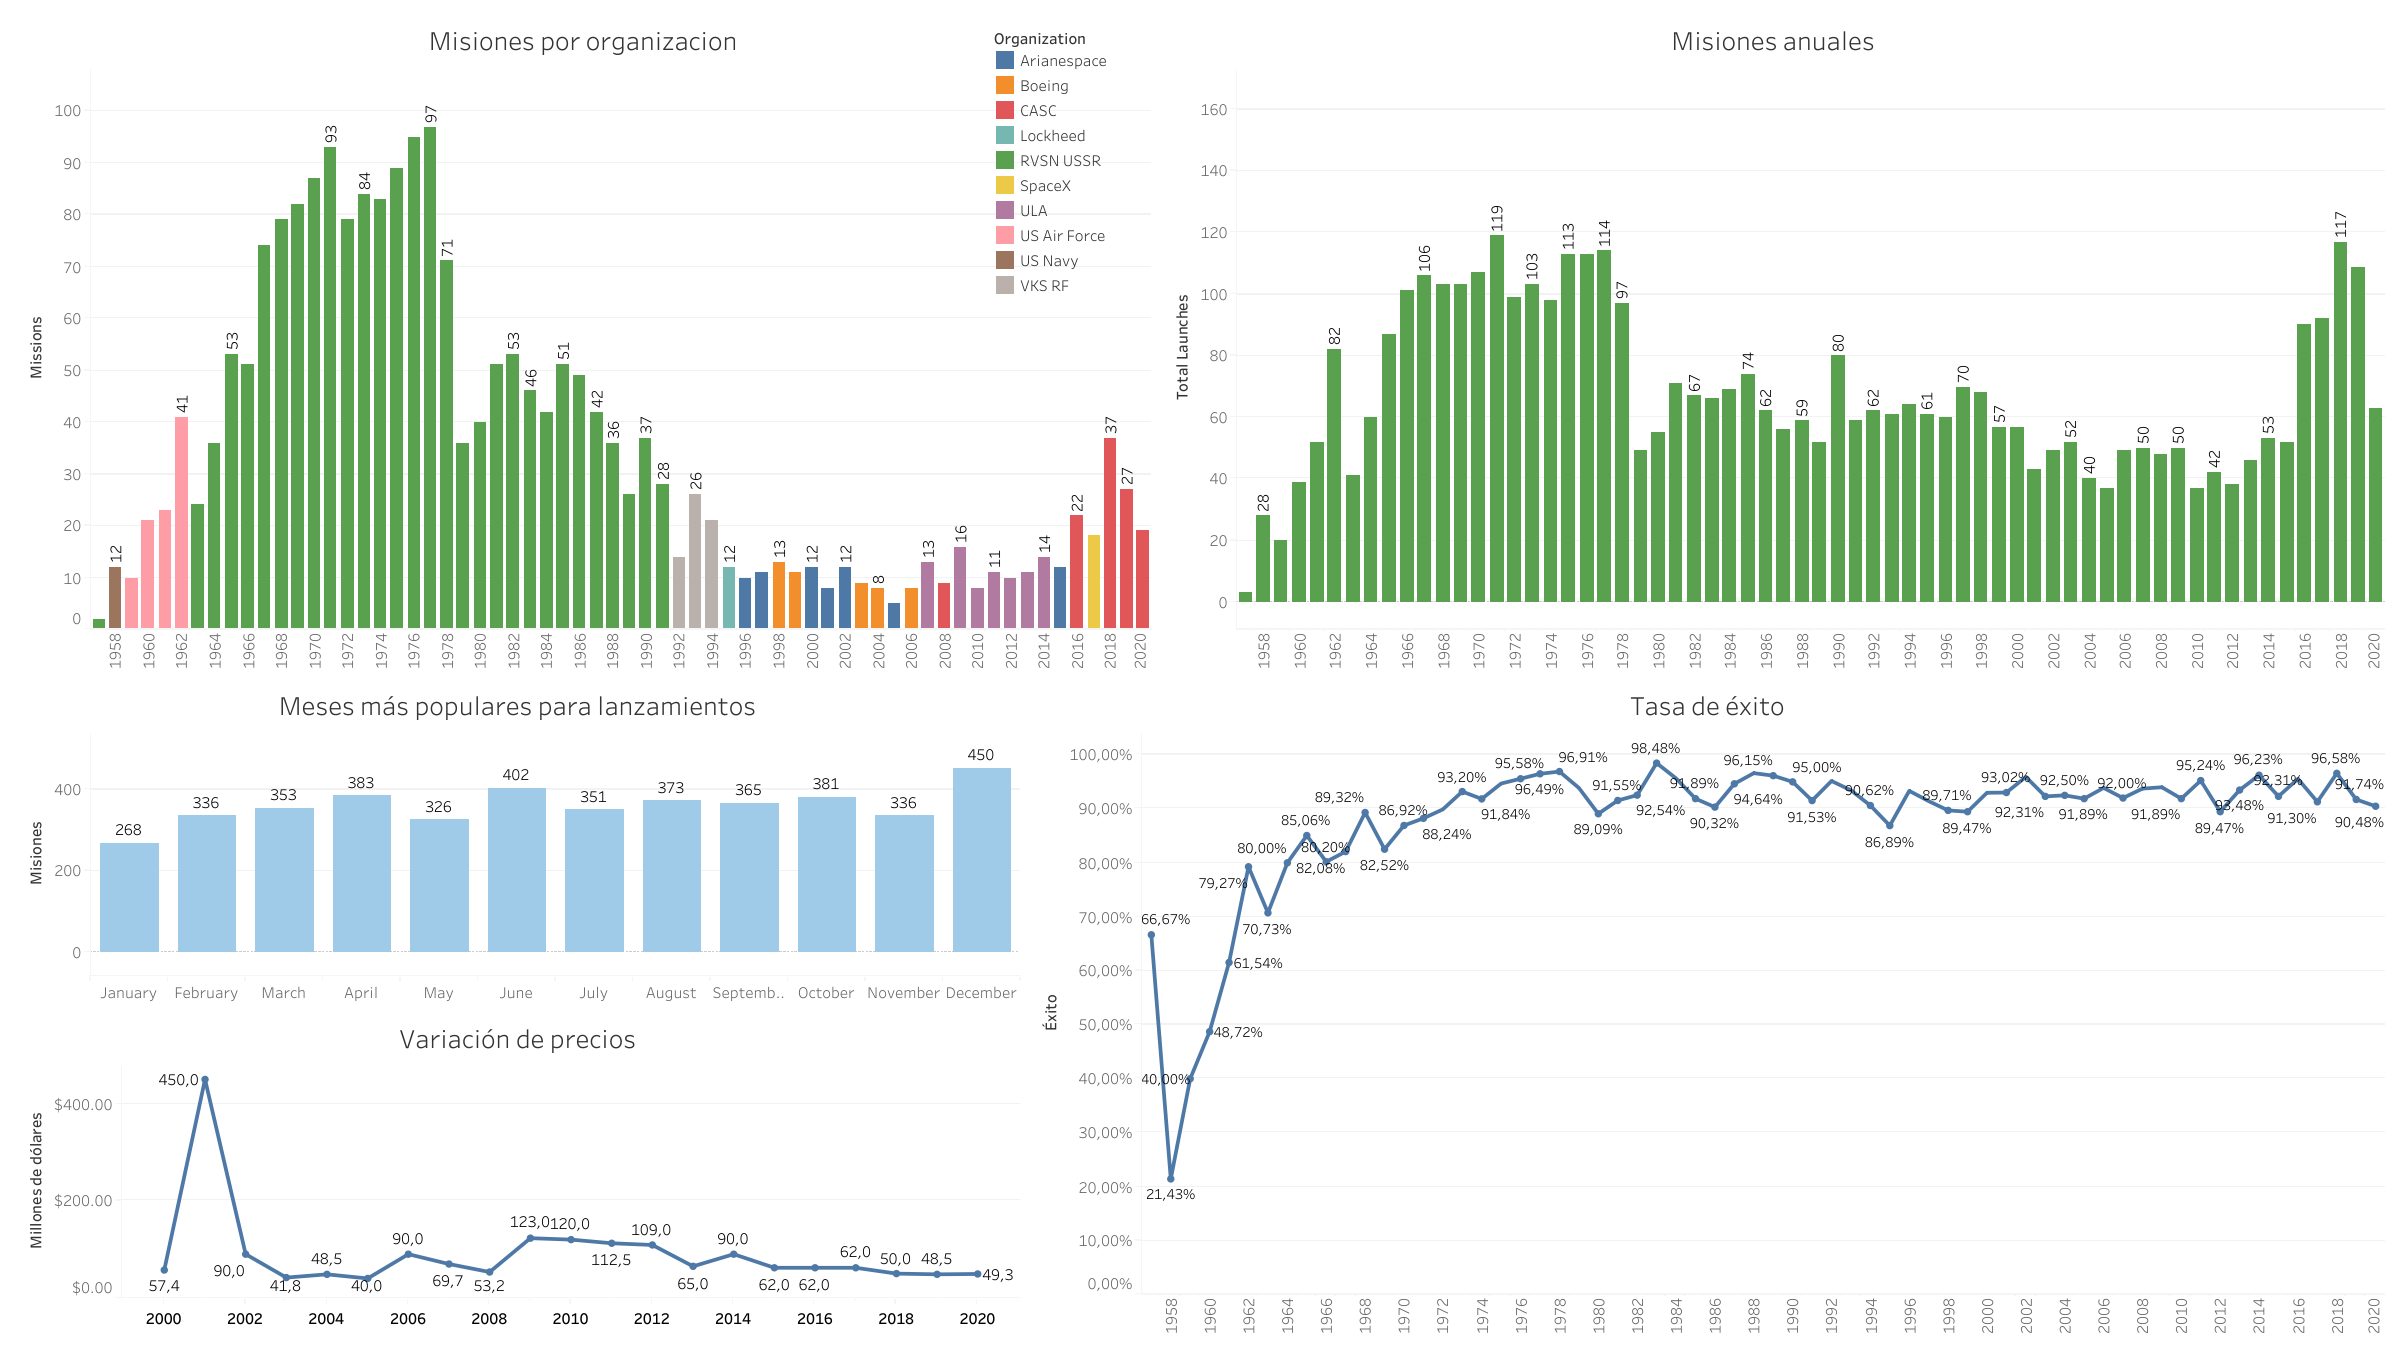